In [1]:
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [4]:
library(readr)
library(dplyr)
library(ggplot2)
library(forecast)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [5]:
coca <- read.csv("CocoaPrice.csv")

In [6]:
coca$Date <- as.Date(coca$Date)

In [7]:
coca <- coca %>% select(Date, Price) %>% arrange(Date)

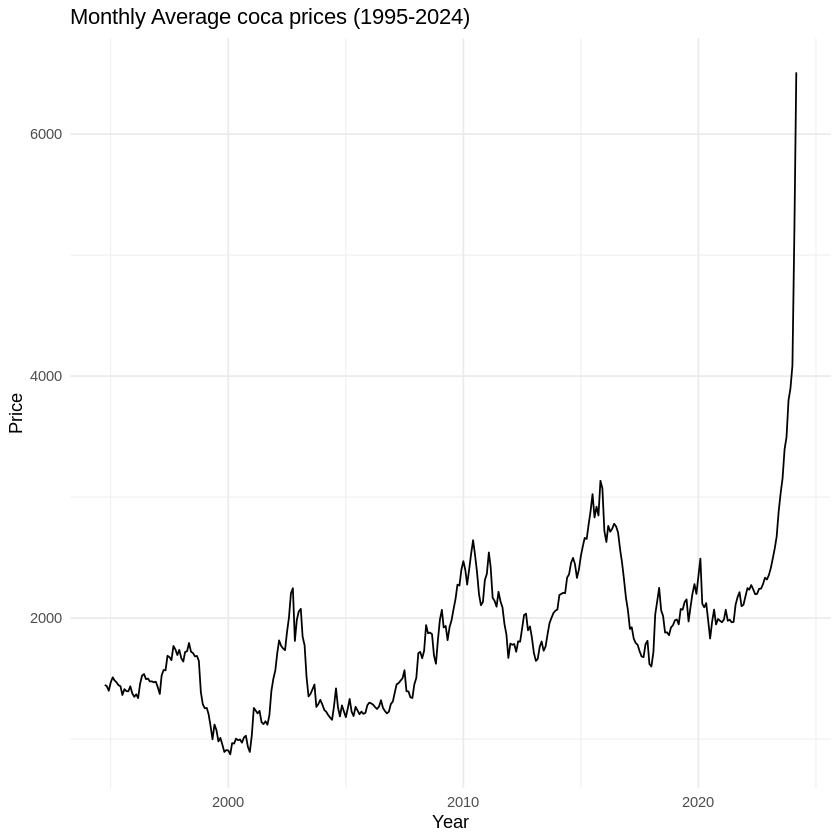

In [8]:
ggplot(coca, aes(x = Date, y = Price)) +
  geom_line() +
  labs(title = "Monthly Average coca prices (1995-2024)",
    x = "Year", y= "Price") +
      theme_minimal()

In [9]:
decomp <- decompose(ts(coca$Price, frequency = 12))

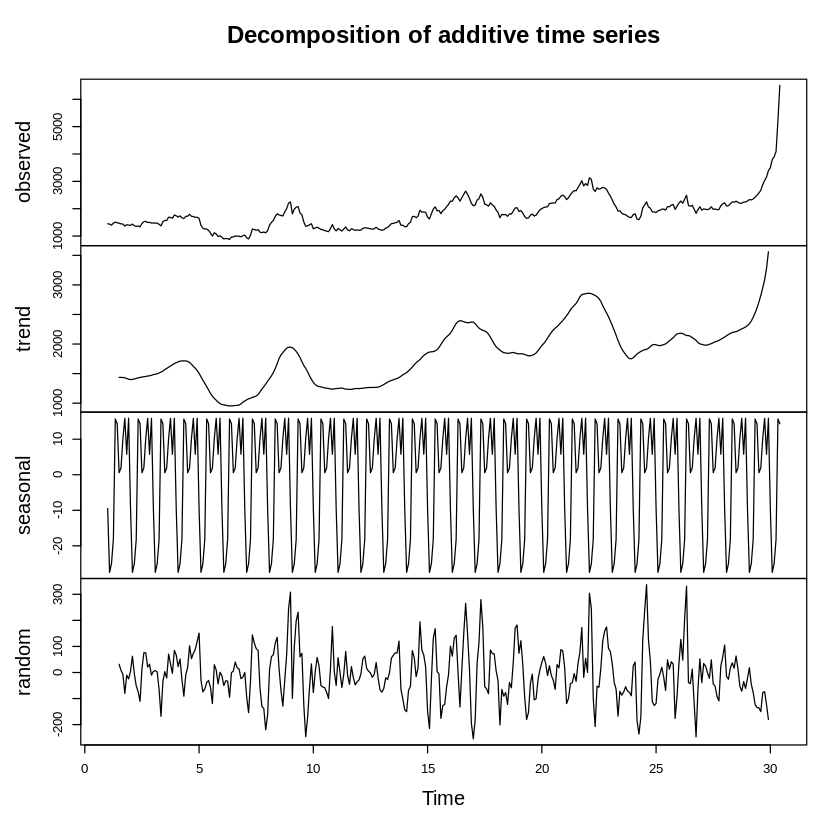

In [10]:
plot(decomp)

In [11]:
missing_values <- sum(is.na(coca))

In [12]:
cat("Number of missing values: ", missing_values, "\n")

Number of missing values:  0 


In [13]:
coca_object <- ts(coca[,2], start = c(1995, 1), frequency = 12)

In [14]:
str(coca_object)

 Time-Series [1:354] from 1995 to 2024: 1448 1437 1399 1469 1511 ...


In [15]:
head(coca_object)

,Jan,Feb,Mar,Apr,May,Jun
1995,1447.95,1437.05,1399.43,1468.86,1510.55,1484.91


In [16]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 11 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_line()`).”


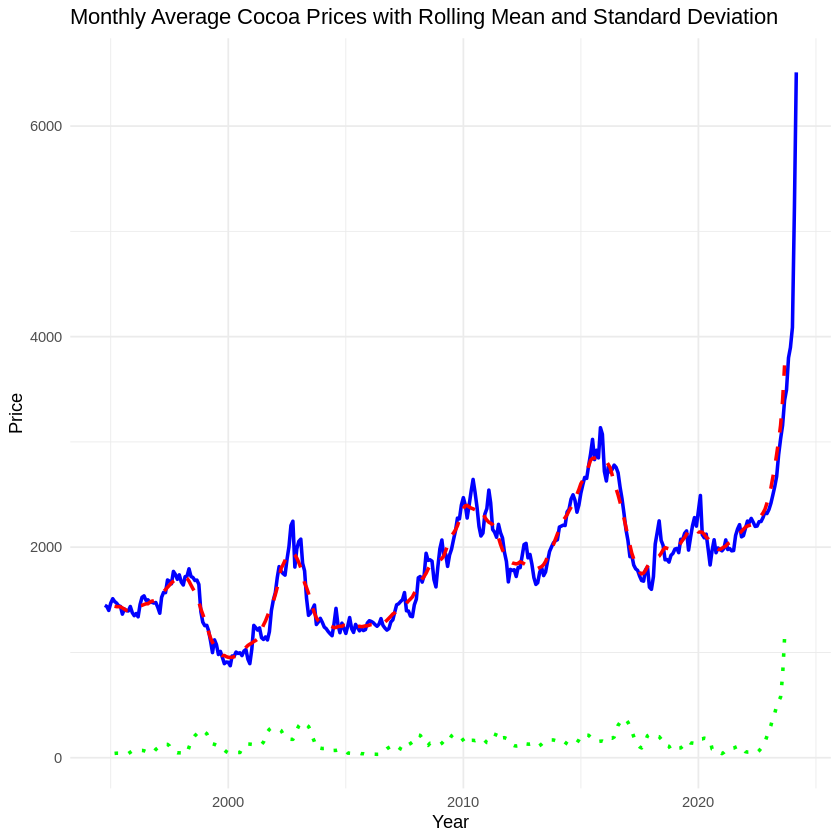

In [18]:
# Load necessary libraries
library(ggplot2)
library(zoo)


# Calculate rolling mean and rolling standard deviation
rolling_mean <- rollmean(coca$Price, k = 12, fill = NA)
rolling_sd <- rollapply(coca$Price, width = 12, FUN = sd, fill = NA)

# Combine data into a data frame
rolling_data <- data.frame(Date = coca$Date, Price = coca$Price,
                            RollingMean = rolling_mean, RollingSD = rolling_sd)

# Plot rolling statistics
ggplot(rolling_data, aes(x = Date)) +
  geom_line(aes(y = Price), color = "blue", size = 1) +
  geom_line(aes(y = RollingMean), color = "red", linetype = "dashed", size = 1) +
  geom_line(aes(y = RollingSD), color = "green", linetype = "dotted", size = 1) +
  labs(title = "Monthly Average Cocoa Prices with Rolling Mean and Standard Deviation",
       x = "Year", y = "Price") +
  theme_minimal()

In [19]:
library(ggplot2)

In [20]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(tseries)

In [22]:
adf.test(coca_object)

Warning message in adf.test(coca_object):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  coca_object
Dickey-Fuller = 0.44251, Lag order = 7, p-value = 0.99
alternative hypothesis: stationary


In [23]:
coca$Date <- as.Date(coca$Date)

In [24]:
cocoa_ts <- zoo(coca$Price, order.by = coca$Date)

In [25]:
adf_result <- adf.test(cocoa_ts)
print(adf_result)

Warning message in adf.test(cocoa_ts):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  cocoa_ts
Dickey-Fuller = 0.44251, Lag order = 7, p-value = 0.99
alternative hypothesis: stationary



In [26]:
library(stats)

In [27]:
coca_uni <- ts(coca$Price, frequency = 12)

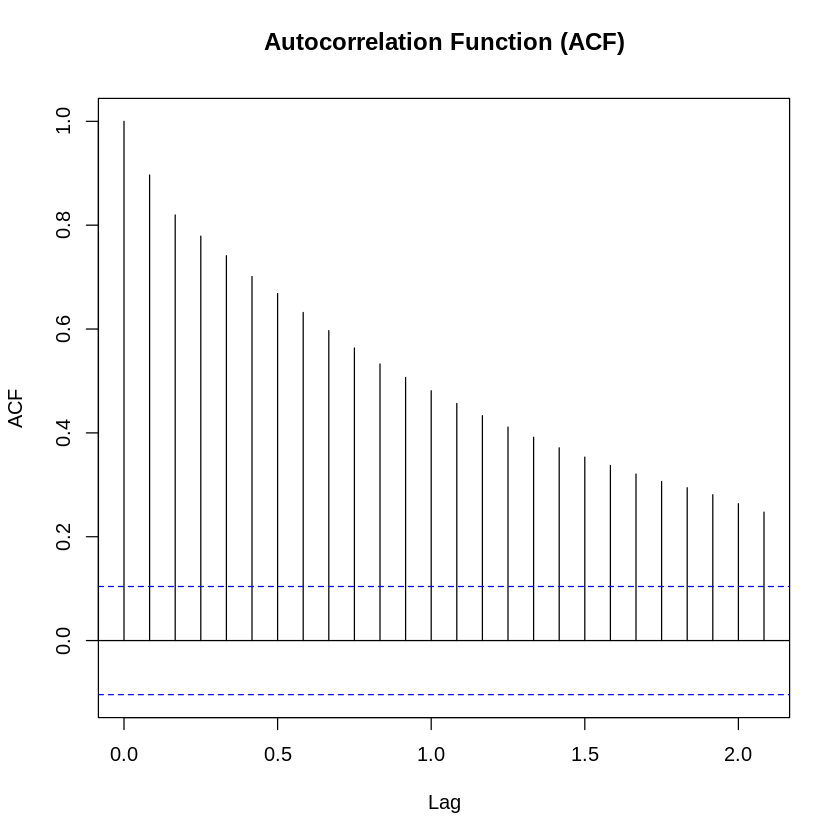

In [28]:
acf_result <- acf(coca_uni, main = "Autocorrelation Function (ACF)")

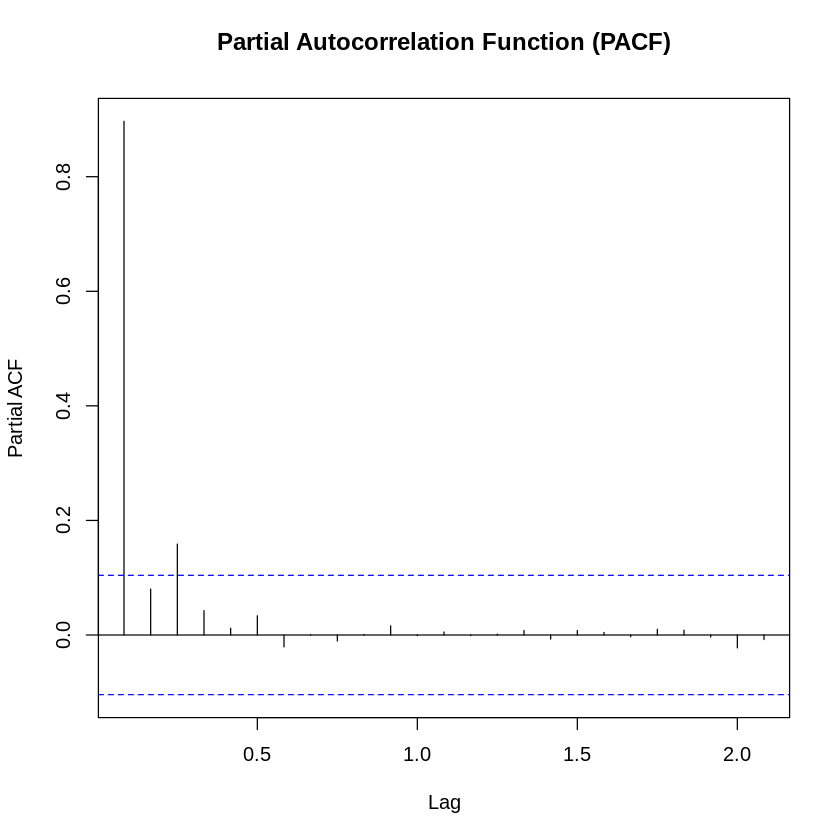

In [29]:
pacf_result <- pacf(coca_uni, main = "Partial Autocorrelation Function (PACF)")

In [30]:
split_date <- as.Date("2023-10-01")

In [31]:
coca <- coca[order(coca$Date), ]

In [32]:
split_point <- floor(0.7 * nrow(coca))

In [33]:
train_data <- coca[1:split_point, ]

In [34]:
test_data <- coca[(split_point + 1):nrow(coca), ]

In [35]:
dim(test_data)

[1] 107   2

In [36]:
dim(train_data)

[1] 247   2

In [37]:
rm(train, test)

Warning message in rm(train, test):
“object 'train' not found”
Warning message in rm(train, test):
“object 'test' not found”


In [41]:
train_data

,Date,Price
,<date>,<dbl>
1,1994-10-01,1447.95
2,1994-11-01,1437.05
3,1994-12-01,1399.43
4,1995-01-01,1468.86
5,1995-02-01,1510.55
6,1995-03-01,1484.91
7,1995-04-01,1469.26
8,1995-05-01,1445.32
9,1995-06-01,1437.14


In [51]:
test_data

,Date,Price
,<date>,<dbl>
248,2015-05-01,2773.05
249,2015-06-01,2886.50
250,2015-07-01,3023.78
251,2015-08-01,2832.05
252,2015-09-01,2920.68
253,2015-10-01,2848.09
254,2015-11-01,3134.86
255,2015-12-01,3072.68
256,2016-01-01,2720.15


In [55]:
train_data <- as.numeric(train_data$Price)

In [57]:
test_data <- as.numeric(test_data$Price)

In [56]:
mean_forecast <- meanf(train_data, h = 6)

In [58]:
mean_forecast

  Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1       1629.909 1074.906 2184.912 779.1996 2480.618
2       1629.909 1074.906 2184.912 779.1996 2480.618
3       1629.909 1074.906 2184.912 779.1996 2480.618
4       1629.909 1074.906 2184.912 779.1996 2480.618
5       1629.909 1074.906 2184.912 779.1996 2480.618
6       1629.909 1074.906 2184.912 779.1996 2480.618

In [59]:
random_walk_fr <- rwf(train_data, h=6)

In [60]:
random_walk_fr

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
248        2653.43 2535.729 2771.131 2473.422 2833.438
249        2653.43 2486.976 2819.884 2398.861 2907.999
250        2653.43 2449.566 2857.294 2341.647 2965.213
251        2653.43 2418.029 2888.831 2293.415 3013.445
252        2653.43 2390.243 2916.617 2250.920 3055.940
253        2653.43 2365.123 2941.737 2212.503 3094.357

In [61]:
snaive_method <- snaive(train_data, h = 6)

In [62]:
train_ts <- ts(train_data, frequency = 12)

In [63]:
forecast_dates <- seq(as.Date("2023-10-01"), by = "month", length.out = 6)

In [64]:
mean_forecast <- meanf(train_ts, h = 6)

In [65]:
mean_forecast$x <- forecast_dates

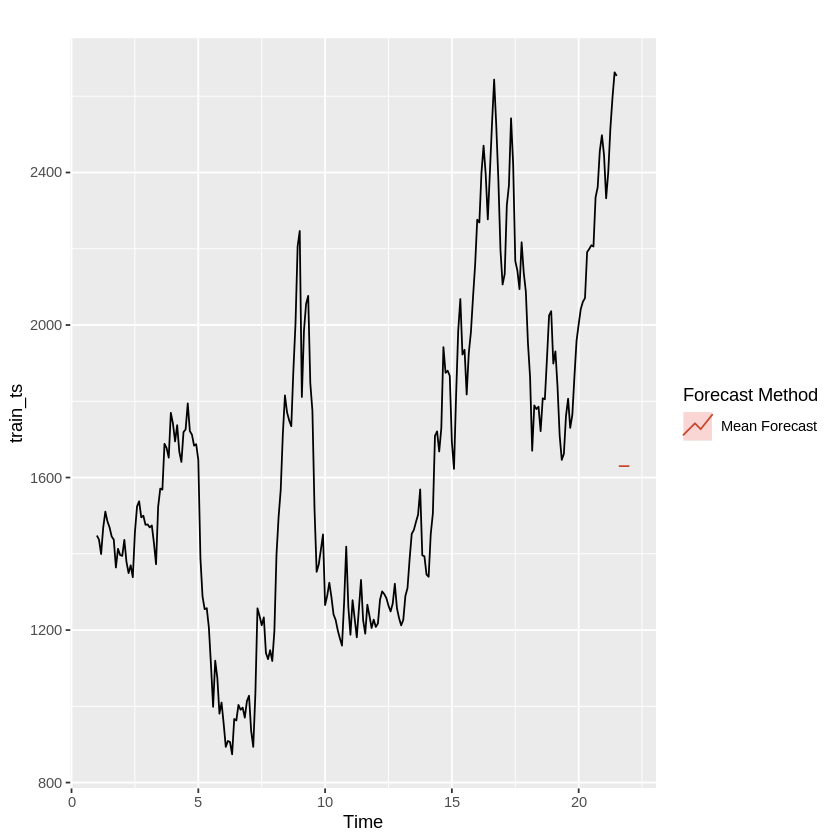

In [66]:
autoplot(train_ts) +
  autolayer(mean_forecast, series = "Mean Forecast", PI = FALSE) +
  guides(colour = guide_legend(title = "Forecast Method"))

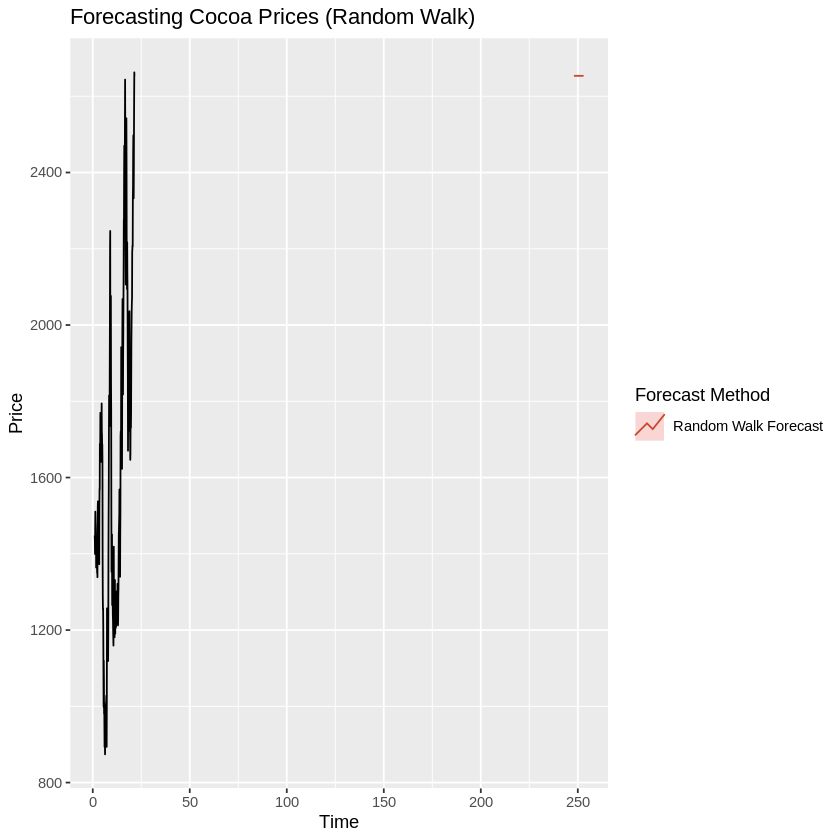

In [67]:
autoplot(train_ts) +
  autolayer(random_walk_fr, series = "Random Walk Forecast", PI = FALSE) +
  labs(title = "Forecasting Cocoa Prices (Random Walk)",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

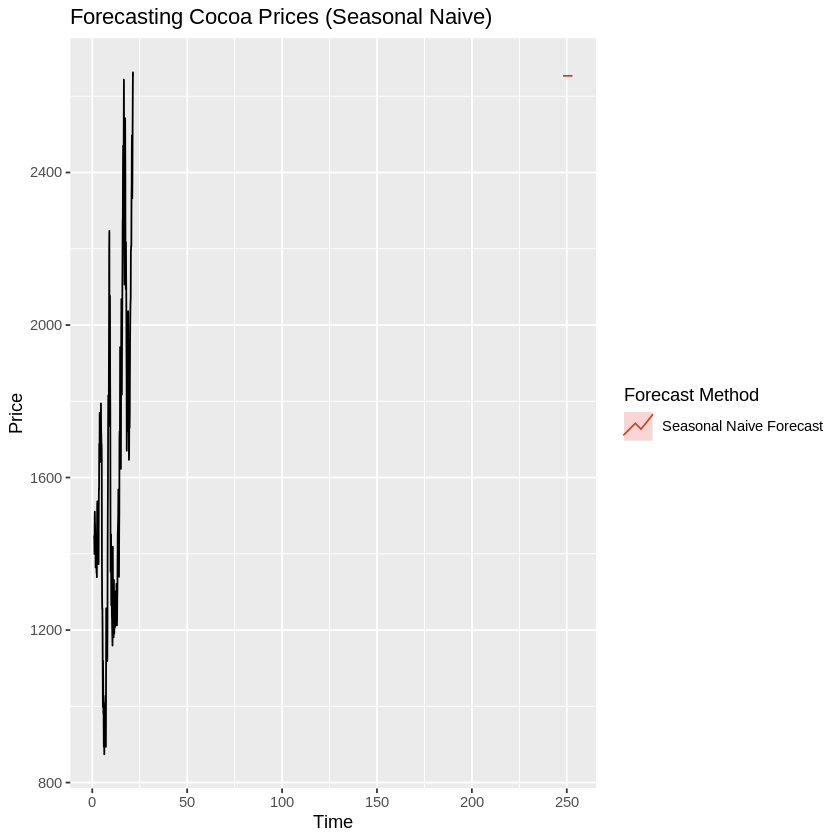

In [68]:
autoplot(train_ts) +
  autolayer(snaive_method, series = "Seasonal Naive Forecast", PI = FALSE) +
  labs(title = "Forecasting Cocoa Prices (Seasonal Naive)",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

In [69]:
ses_model <- ses(train_ts, h = 6)

In [70]:
holt_method <- holt(train_ts, h = 6)

In [71]:
hw_model <- ets(train_ts, model = "ZZZ", damped = FALSE)

In [72]:
ses_forecast <- forecast(ses_model, h = 6)
holt_forecast <- forecast(holt_method, h = 6)
hw_forecast <- forecast(hw_model, h = 6)

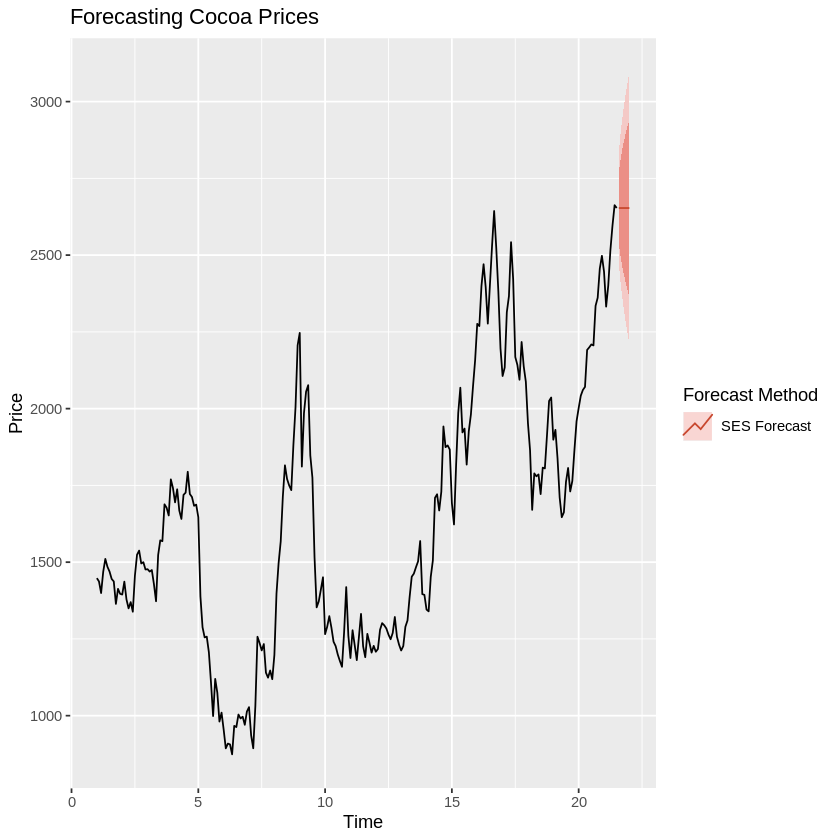

In [73]:
autoplot(train_ts) +
  autolayer(ses_forecast, series = "SES Forecast") +
  labs(title = "Forecasting Cocoa Prices",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

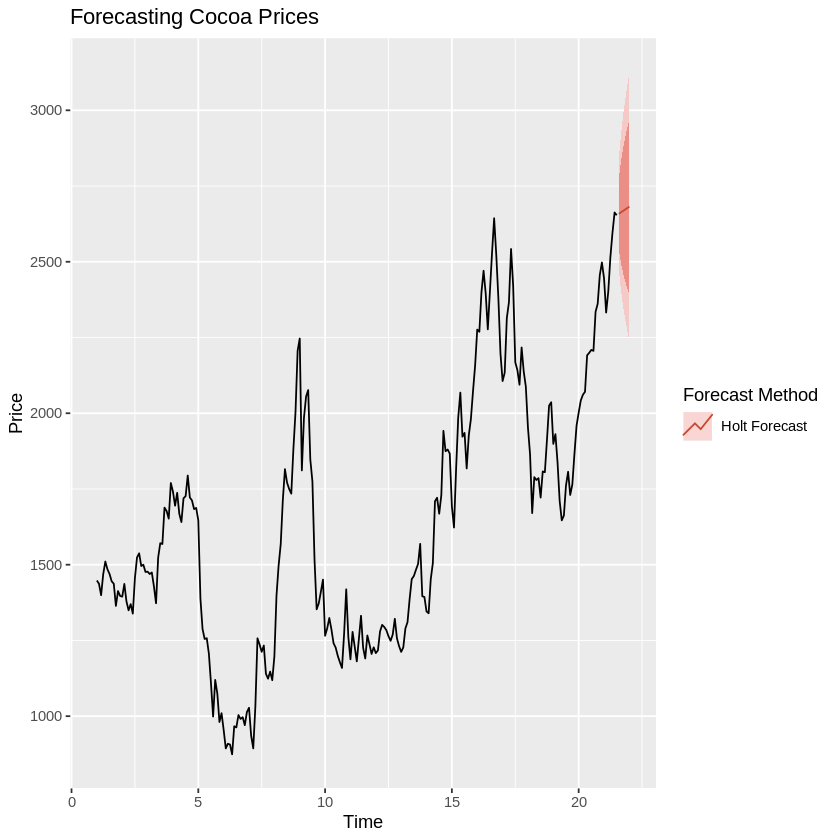

In [74]:
autoplot(train_ts) +
  autolayer(holt_forecast, series = "Holt Forecast") +
  labs(title = "Forecasting Cocoa Prices",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

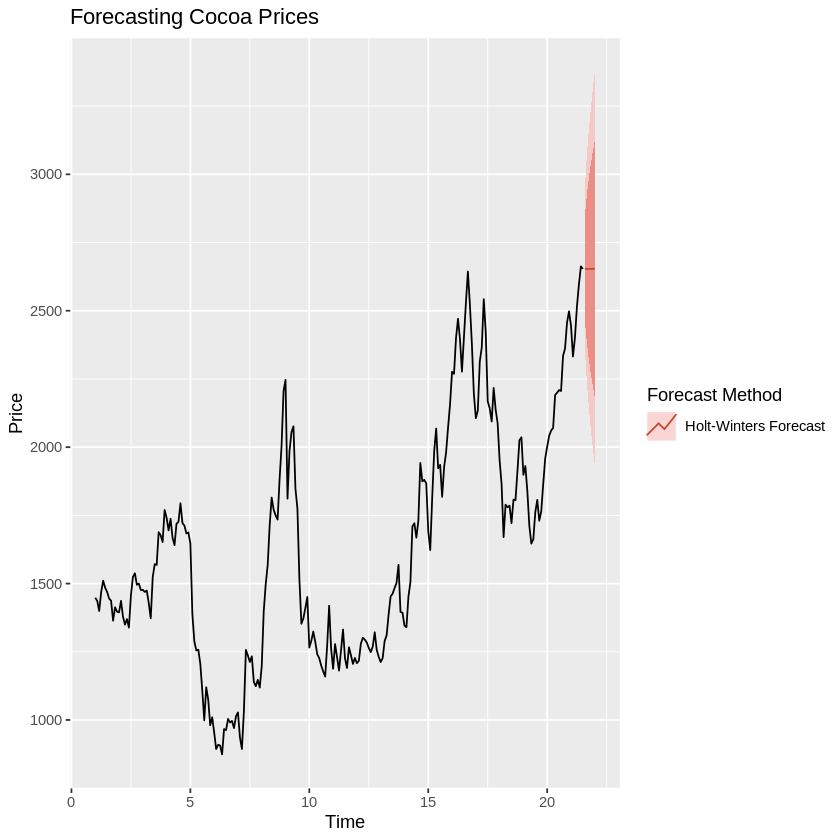

In [75]:
autoplot(train_ts) +
  autolayer(hw_forecast, series = "Holt-Winters Forecast") +
  labs(title = "Forecasting Cocoa Prices",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

In [76]:
arima_model <- auto.arima(train_ts)

In [77]:
sarima_model <- auto.arima(train_ts, seasonal = TRUE)

In [78]:
arima_forecast <- forecast(arima_model, h = 6)
sarima_forecast <- forecast(sarima_model, h = 6)

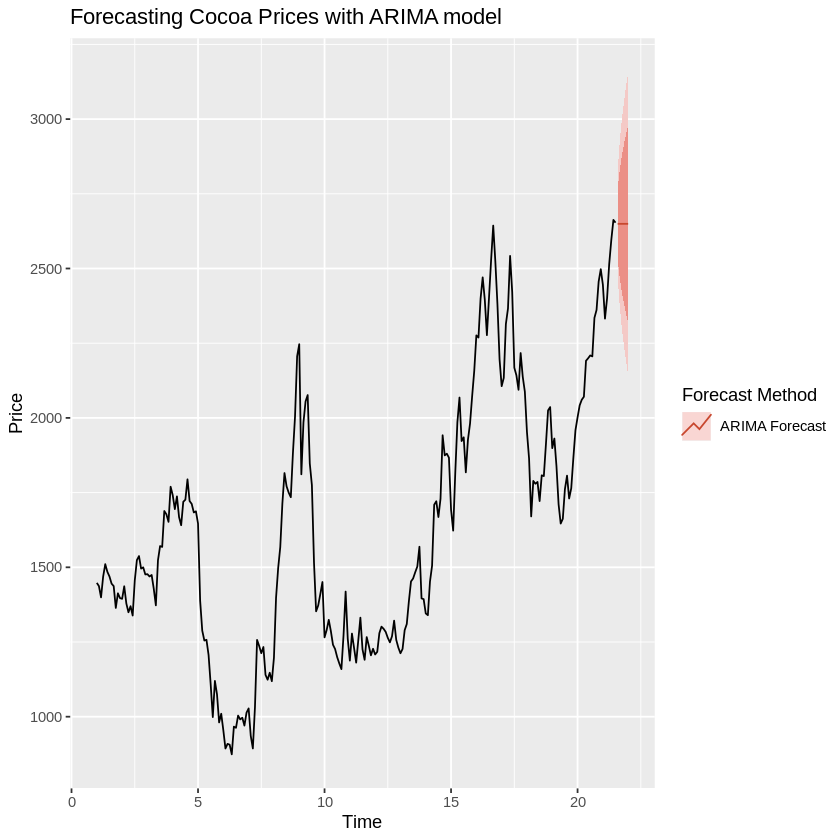

In [79]:
autoplot(train_ts) +
  autolayer(arima_forecast, series = "ARIMA Forecast") +
  labs(title = "Forecasting Cocoa Prices with ARIMA model",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

In [80]:
autoplot(train_ts) +
  autolayer(sarima_forecast, series = "SARIMA Forecast") +
  autolayer(test_ts, series = "Actual") +
  labs(title = "Forecasting Cocoa Prices with ARIMA model",
       y = "Price") +
  guides(colour = guide_legend(title = "Forecast Method"))

ERROR: Error in eval(expr, envir, enclos): object 'test_ts' not found


In [81]:
test_ts <- ts(test_data, frequency = 12)

In [90]:
arima_forecast <- forecast(arima_model, h = length(test_data))

In [92]:
accuracy_arima <- accuracy(arima_forecast, x = test_data)
print("Accuracy for ARIMA model:")
print(accuracy_arima)

[1] "Accuracy for ARIMA model:"
                      ME      RMSE       MAE          MPE      MAPE      MASE
Training set    4.061779  89.99776  66.36093   0.08247253  4.122564 0.9689153
Test set     -281.441524 743.91155 579.29452 -18.14721065 25.433178 8.4580991
                     ACF1
Training set -0.008612401
Test set               NA


In [94]:
sarima_forecast <- forecast(sarima_model, h = length(test_data))

In [95]:
accuracy_sarima <- accuracy(sarima_forecast, x = test_data)
print("Accuracy for SARIMA model:")
print(accuracy_sarima)


[1] "Accuracy for SARIMA model:"
                      ME      RMSE       MAE          MPE      MAPE      MASE
Training set    4.061779  89.99776  66.36093   0.08247253  4.122564 0.9689153
Test set     -281.441524 743.91155 579.29452 -18.14721065 25.433178 8.4580991
                     ACF1
Training set -0.008612401
Test set               NA


In [97]:
rmse_arima <- sqrt(mean((arima_forecast$mean - test_data)^2))
print("RMSE for ARIMA model:")
print(rmse_arima)

[1] "RMSE for ARIMA model:"
[1] 743.9115


In [98]:
rmse_sarima <- sqrt(mean((sarima_forecast$mean - test_data)^2))
print("RMSE for SARIMA model:")
print(rmse_sarima)

[1] "RMSE for SARIMA model:"
[1] 743.9115


In [104]:
ses_model <- ses(train_data, h = length(test_data))


In [105]:
accuracy_ses <- accuracy(ses_model, x = test_data)
print("Accuracy for SES model:")
print(accuracy_ses)

[1] "Accuracy for SES model:"
                      ME      RMSE      MAE          MPE      MAPE      MASE
Training set    4.880229  91.65787  68.2148   0.08805751  4.217377 0.9959831
Test set     -285.444187 745.43507 581.3520 -18.32570330 25.549257 8.4881392
                  ACF1
Training set 0.1730849
Test set            NA


In [107]:
rmse_ses <- sqrt(mean((forecast(ses_model, h = length(test_data))$mean - test_data)^2))
print("RMSE for SES model:")
print(rmse_ses)

[1] "RMSE for SES model:"
[1] 745.4351


In [109]:
# Holt's Linear Trend Method with a longer horizon
holt_model <- holt(train_data, h = length(test_data))



# Calculate accuracy for Holt's Linear Trend Method
accuracy_holt <- accuracy(holt_model, x = test_data)
print("Accuracy for Holt's Linear Trend Method:")
print(accuracy_holt)

# Calculate RMSE for Holt's Linear Trend Method
rmse_holt <- sqrt(mean((forecast(holt_model, h = length(test_data))$mean - test_data)^2))
print("RMSE for Holt's Linear Trend Method:")
print(rmse_holt)



[1] "Accuracy for Holt's Linear Trend Method:"
                        ME      RMSE       MAE         MPE      MAPE      MASE
Training set    0.09328361  91.54334  68.24616  -0.2266922  4.237583  0.996441
Test set     -543.19086422 858.70815 742.78879 -29.5346325 34.135121 10.845228
                  ACF1
Training set 0.1733402
Test set            NA
[1] "RMSE for Holt's Linear Trend Method:"
[1] 858.7082


In [110]:
# Calculate mean forecast
mean_forecast <- meanf(train_data, h = length(test_data))

# Calculate accuracy for Mean Forecast
accuracy_mean <- accuracy(mean_forecast, x = test_data)
print("Accuracy for Mean Forecast:")
print(accuracy_mean)

# Calculate RMSE for Mean Forecast
rmse_mean <- sqrt(mean((mean_forecast$mean - test_data)^2))
print("RMSE for Mean Forecast:")
print(rmse_mean)

# Calculate seasonal naive forecast
snaive_forecast <- snaive(train_data, h = length(test_data))

# Calculate accuracy for Seasonal Naive Forecast
accuracy_snaive <- accuracy(snaive_forecast, x = test_data)
print("Accuracy for Seasonal Naive Forecast:")
print(accuracy_snaive)

# Calculate RMSE for Seasonal Naive Forecast
rmse_snaive <- sqrt(mean((snaive_forecast$mean - test_data)^2))
print("RMSE for Seasonal Naive Forecast:")
print(rmse_snaive)

# Calculate random walk forecast
rw_forecast <- rwf(train_data, h = length(test_data))

# Calculate accuracy for Random Walk Forecast
accuracy_rw <- accuracy(rw_forecast, x = test_data)
print("Accuracy for Random Walk Forecast:")
print(accuracy_rw)

# Calculate RMSE for Random Walk Forecast
rmse_rw <- sqrt(mean((rw_forecast$mean - test_data)^2))
print("RMSE for Random Walk Forecast:")
print(rmse_rw)


[1] "Accuracy for Mean Forecast:"
                        ME      RMSE      MAE       MPE     MAPE    MASE
Training set -5.581410e-14  430.1629 360.5256 -7.210807 23.69782 1.00000
Test set      7.380777e+02 1009.4324 738.8216 27.316694 27.36305 2.04929
[1] "RMSE for Mean Forecast:"
[1] 1009.432
[1] "Accuracy for Seasonal Naive Forecast:"
                      ME      RMSE       MAE          MPE      MAPE     MASE
Training set    4.900325  91.84236  68.48992   0.08846321  4.234395 1.000000
Test set     -285.443271 745.43472 581.35150 -18.32566244 25.549231 8.488132
                  ACF1
Training set 0.1729613
Test set            NA
[1] "RMSE for Seasonal Naive Forecast:"
[1] 745.4347
[1] "Accuracy for Random Walk Forecast:"
                      ME      RMSE       MAE          MPE      MAPE     MASE
Training set    4.900325  91.84236  68.48992   0.08846321  4.234395 1.000000
Test set     -285.443271 745.43472 581.35150 -18.32566244 25.549231 8.488132
                  ACF1
Training set